# Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
dataset = pd.read_csv('Clustering.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the elbow method to find the optimal number of clusters

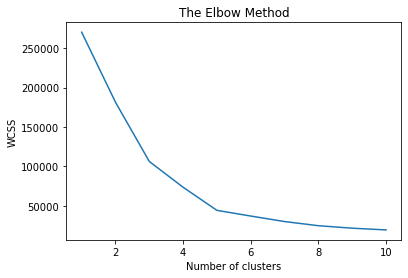

In [3]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [4]:
#n_clusters = 5, because of the elbow
#init = 'k-means' to prevent the Random initialization trap
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

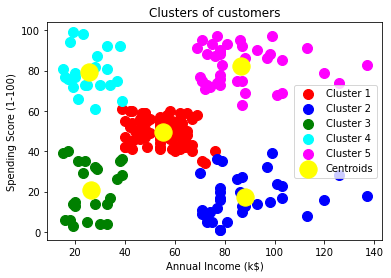

In [5]:
#1st way to plot the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

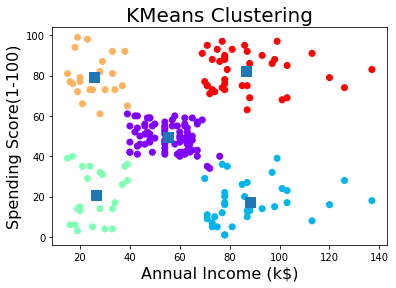

In [6]:
#2nd way to plot the clusters
plt.scatter(X[:,0] , X[:,1] , c=y_kmeans , cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1], marker='s' , s=100)
plt.xlabel('Annual Income (k$)' , fontsize=16)
plt.ylabel('Spending Score(1-100)' , fontsize=16)
plt.title('KMeans Clustering' , fontsize=20)
plt.show()

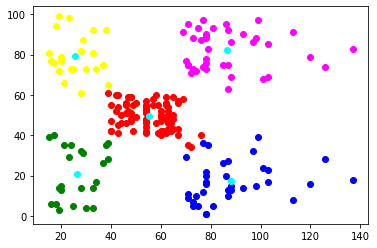

In [7]:
#3rd way to plot the clusters
y_set = set(y_kmeans)
colors = ('red','blue','green','yellow','magenta')
for i in y_set:
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], color = colors[i])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="cyan")
plt.show()